<hr>
<font color='purple'>
    <font size="+3"><strong> 
Name: Theophilus Uwoghiren
</font>

<br>
<hr>

<font color='green'>
    <font size="+3"><strong> 
Hamoye ID: 14843ce775c1f000
 </font>

<br>
<hr>

<font color='black'>
    <font size="+3">
Track: Data Science 
</font>         

<br>
<hr>
    
<font size="+3">
Stage E Assessment
</font>
<hr>

<br>
<font size="+3"><strong> 
Data Preprocessing
</strong>
</font>

**Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#time series
from statsmodels.tsa.stattools import adfuller    
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from prophet import Prophet

from datetime import datetime

C:\Users\Theophilus Uwoghiren\.conda\envs\Py\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
custom_date = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")


**Reading DataFrame**

In [3]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv',index_col='FullDate',parse_dates=True)

print(df.shape)
df.head()

(92016, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


<br>
<font size="+3"><strong> 
Answering Quiz Questions
</strong>
</font>

**QUESTION 11**

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

In [5]:
#daily dataframe

df = df.resample('D').sum()

print(df.shape)
df.head()

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


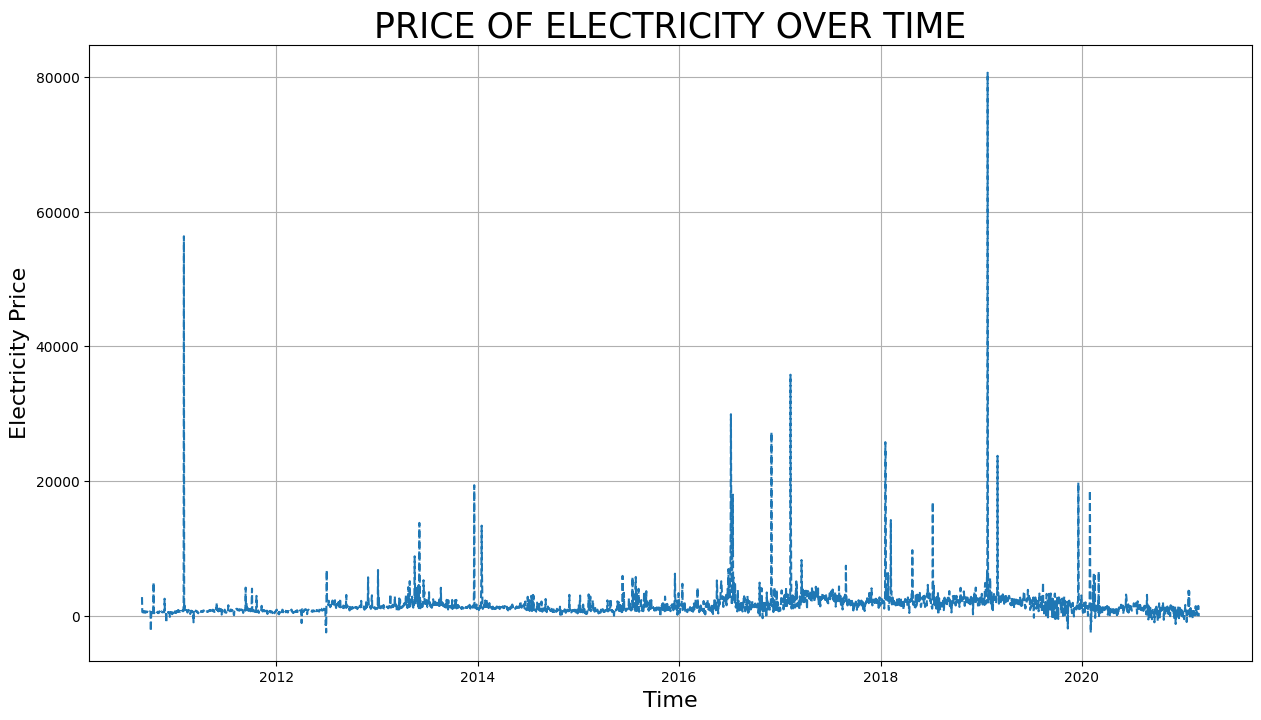

In [7]:
#plot of the daily global_active_power over time
plt.figure(figsize=(15,8))
plt.plot(df.index, df.ElecPrice, '--')
plt.grid()
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Electricity Price', fontsize = 16)
plt.title('PRICE OF ELECTRICITY OVER TIME', fontsize = 25)
plt.show()

**QUESTION 12**

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [8]:
adf_result = adfuller(df['SysLoad'])
print(f'The p-value of SysLoad = : {round(adf_result[1],6)}')

The p-value of SysLoad = : 0.004254


In [9]:
adf_result = adfuller(df['GasPrice'])
print(f'The p-value of GasPrice =: {round(adf_result[1],6)}')

The p-value of GasPrice =: 0.045027


**QUESTION 13**

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [10]:
#GasPrice
adf_result = adfuller(df['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print('Critical Values :')

for k, v in adf_result[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic: -2.9027666971651813
Critical Values :
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [11]:
#ElecPrice
adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print('Critical Values:')

for k, v in adf_result[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic: -8.26905386687381
Critical Values:
1% : -3.4321
5% : -2.8623
10% : -2.5672


<br>
<font size="+3"><strong> 
UNIVARIATE TIME SERIES MODEL
</strong>
</font>

Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16


In [12]:
# reset index
df_daily = df.reset_index()
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [13]:
# select columns for predictive model
model_data = df_daily[['FullDate', 'ElecPrice']]

#rename columns to 'ds' and 'y' respectively
model_data = model_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

model_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [14]:
# assign train and test data
train = model_data[:2757]
test = model_data[2757:]

In [15]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [16]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [17]:
train.dtypes

index             int64
ds       datetime64[ns]
y               float64
dtype: object

**Facebook Prophet**

In [18]:
model = Prophet() 

model.fit(train[['ds', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [19]:
test_pred = test[['ds']]
forecast = model.predict(test_pred)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2679.523236,82.697590,4967.937525,2679.523236,2679.523236,-154.882441,-154.882441,-154.882441,9.737801,9.737801,9.737801,-164.620241,-164.620241,-164.620241,0.0,0.0,0.0,2524.640796
1,2018-03-21,2680.298031,367.627162,5031.483726,2680.298031,2680.298031,-2.419802,-2.419802,-2.419802,159.363178,159.363178,159.363178,-161.782980,-161.782980,-161.782980,0.0,0.0,0.0,2677.878229
2,2018-03-22,2681.072826,309.046553,5202.838214,2681.072826,2681.072826,95.746291,95.746291,95.746291,257.127937,257.127937,257.127937,-161.381646,-161.381646,-161.381646,0.0,0.0,0.0,2776.819117
3,2018-03-23,2681.847620,251.202093,5107.580305,2681.847620,2681.847620,-112.972998,-112.972998,-112.972998,50.277336,50.277336,50.277336,-163.250334,-163.250334,-163.250334,0.0,0.0,0.0,2568.874622
4,2018-03-24,2682.622415,-257.943190,4567.436099,2682.622415,2682.622415,-438.612511,-438.612511,-438.612511,-271.465795,-271.465795,-271.465795,-167.146716,-167.146716,-167.146716,0.0,0.0,0.0,2244.009904


**QUESTION 14**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places? Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.


In [20]:
!pip install sklearn

In [21]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test.y, forecast.yhat) * 100
print("The MAPE is :",round(mape,2))

The MAPE is : 540.82


**QUESTION 15**

What is the RMSE in 2 decimal places?


In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.y, forecast.yhat))
print("The RMSE is :", round(rms,2))

The RMSE is : 3200.06


**QUESTION 16**

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?


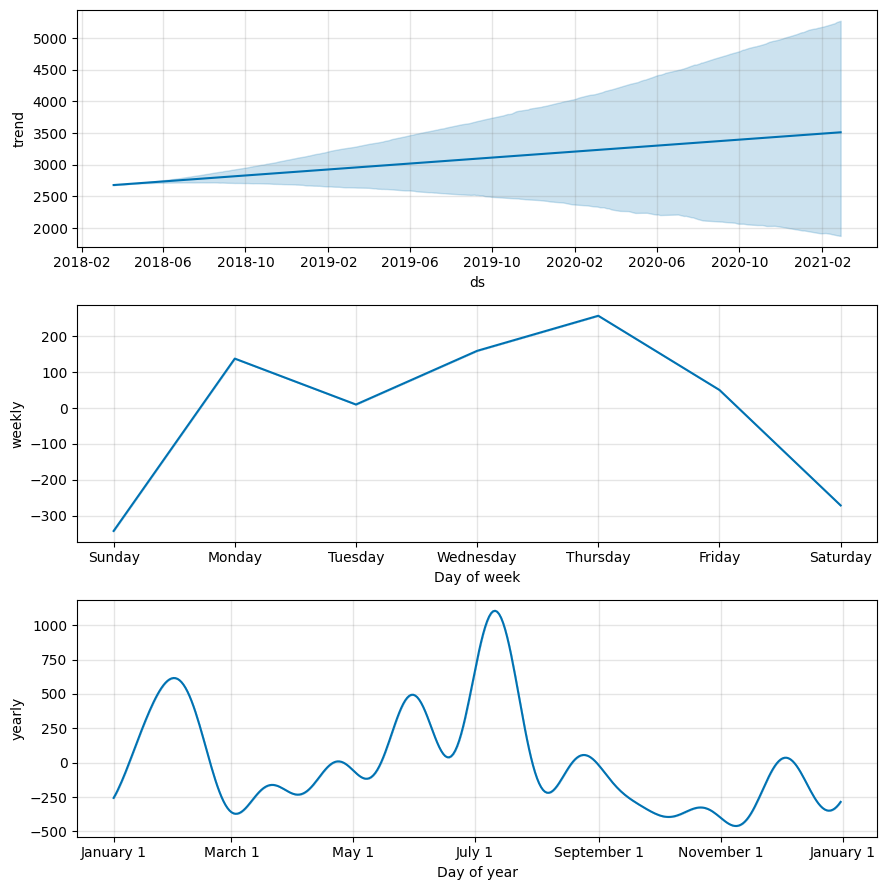

In [23]:
model.plot_components(forecast)
plt.show()

**Answer:** July


<br>
<font size="+3"><strong> 
MULTIVARIATE TIME SERIES MODEL
</strong>
</font>

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

In [24]:
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
df_daily.reset_index(inplace=True)
new_df = df_daily
print(new_df.shape)
new_df.head()

(3834, 6)


,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [26]:
new_df = new_df.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                     'Tmax':'add2',
                                    'GasPrice':'add3'})

In [27]:
train = new_df[:2757]
test = new_df[2757:]
print(train.shape)
print(test.shape)

(2757, 6)
(1077, 6)


In [28]:
multi_model = Prophet(daily_seasonality=True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
multi_model.fit(train)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


**QUESTION 17**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [29]:
forcast_2 = multi_model.predict(test)
y = np.array(test.y)
yp = np.array(forcast_2.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 232.08


**QUESTION 18**

What is the RMSE in 2 decimal places?

In [30]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y,yp))
print('The Root Mean Square Error (RMSE) value Is : {}'.format(round(rmse,2)))

The Root Mean Square Error (RMSE) value Is : 2707.82


**QUESTION 19**

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

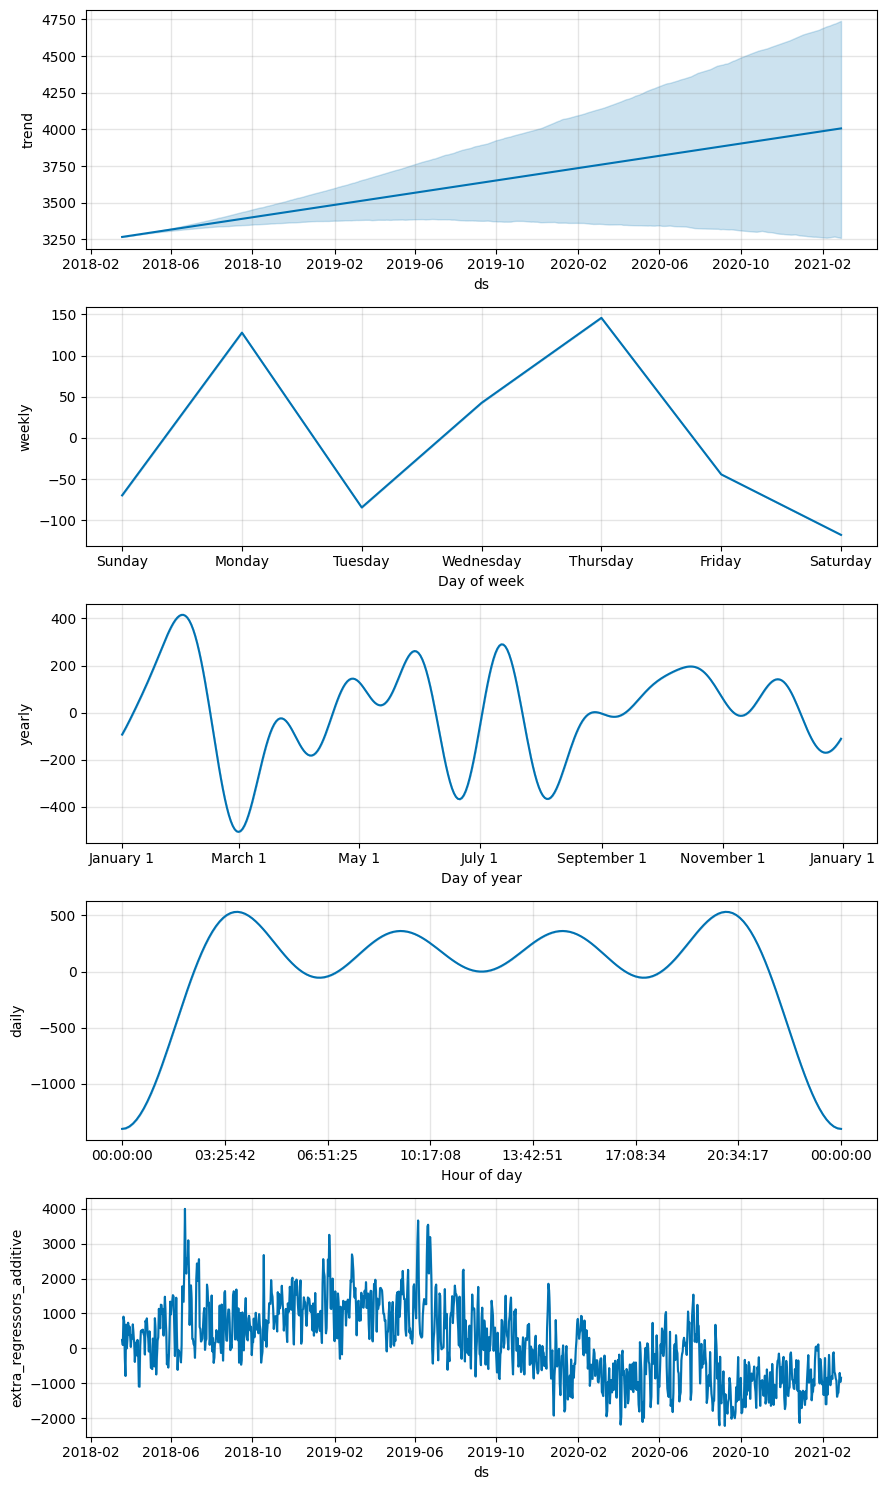

In [31]:
multi_model.plot_components(forcast_2)
plt.show()

**Answer:** Thursday

**QUESTION 20**

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?


In [32]:
df_daily.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [33]:
drop_df = df_daily.drop('Tmax', axis = 1)
drop_df.shape

(3834, 5)

In [34]:
drop_df = drop_df.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                    'GasPrice':'add2'})

In [35]:
drop_df.head()

,index,ds,add1,add2,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [36]:
train = drop_df[:2757]
test = drop_df[2757:]
print(train.shape)
print(test.shape)

(2757, 5)
(1077, 5)


In [37]:
multi_model = Prophet(daily_seasonality=True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.fit(train)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [38]:
forcast_3 = multi_model.predict(test)
y = np.array(test.y)
yp = np.array(forcast_3.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 230.71
